###  Text Data 

### Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Importing required libraries for NLP

In [5]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

In [8]:
data = pd.read_csv("reviews_df.csv")
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,1,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
2,2,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
3,3,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
4,4,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...


In [9]:
data.shape

(120000, 11)

In [10]:
data.isnull().sum()

Unnamed: 0                 0
Id                         0
ProductId                  0
UserId                     0
ProfileName               12
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    4
Text                       0
dtype: int64

In [ ]:
#food is grate 4.5

In [11]:
data=data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119984 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              119984 non-null  int64 
 1   Id                      119984 non-null  int64 
 2   ProductId               119984 non-null  object
 3   UserId                  119984 non-null  object
 4   ProfileName             119984 non-null  object
 5   HelpfulnessNumerator    119984 non-null  int64 
 6   HelpfulnessDenominator  119984 non-null  int64 
 7   Score                   119984 non-null  int64 
 8   Time                    119984 non-null  int64 
 9   Summary                 119984 non-null  object
 10  Text                    119984 non-null  object
dtypes: int64(6), object(5)
memory usage: 11.0+ MB


In [13]:
data.Score.value_counts()

3    39997
4    39994
1    39993
Name: Score, dtype: int64

###  Exploratory Data Analysis

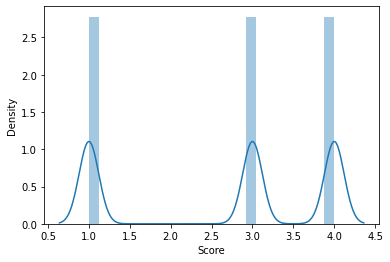

In [14]:
sns.distplot(data.Score);

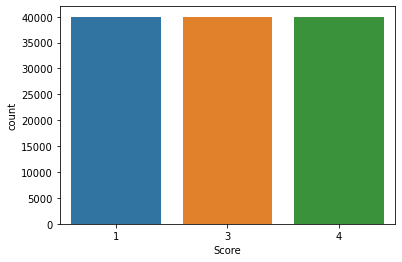

In [15]:
sns.countplot(data.Score);

### Changing Taraget varible to Positive or Negetive or Neutral

In [16]:
my_dict = {5:"1",4:"1",2:"-1",1:"-1",3:'0'}

In [ ]:
1-positive
-1-negative
0-neutral

In [17]:
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,1,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
2,2,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
3,3,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
4,4,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...


In [18]:
data["Score"] = data["Score"].apply(lambda x: my_dict[x])

In [19]:
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,-1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,1,13,B0009XLVG0,A327PCT23YH90,LT,1,1,-1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
2,2,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,-1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
3,3,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,-1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
4,4,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,-1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...


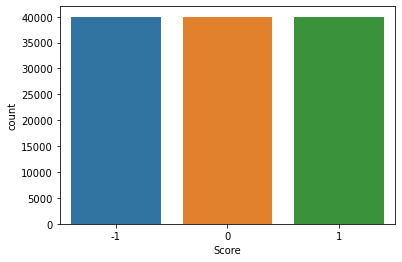

In [20]:
sns.countplot(data.Score);

In [21]:
data.Score.value_counts()

0     39997
1     39994
-1    39993
Name: Score, dtype: int64

### Spliting into X and y

In [22]:
X= data[["Summary"]]
y = data["Score"]

### split into train and test

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=143)

In [24]:
print(X_train.shape,y_train.shape)
print( X_test.shape, y_test.shape)


(83988, 1) (83988,)
(35996, 1) (35996,)


###  Text Preprocessing

In [25]:
from tqdm import tqdm
tqdm.pandas()

In [26]:
stopword = stopwords.words("english")

In [27]:
stopword.remove("not")

In [28]:
X_train["Summary"]

99238                          Likable but not spectacular
34395                                   Not crazy about it
64613                                                  Meh
44215                         Doesn't taste like Diet Coke
14610     Freeze drying doesn't work well with soybeans...
                                ...                       
782                                     Poor quality Kcups
92784                                        Good Product!
113234                  Kuchen Meister four and half stars
20331                               doesn't deserve a star
2046                               Mine Also BURNT flavor!
Name: Summary, Length: 83988, dtype: object

In [29]:
X_train["Summary"][97506]

'Just like gas station coffee :)'

In [30]:
def preprocess(raw_text):
    lemma = WordNetLemmatizer()
#     raw_text = str(raw_text)
    sentence = re.sub("[^a-zA-Z0-9]", " ", raw_text)
#     sentence = re.sub(r'[0-9]', '',str(raw_text))
#     sentence = sentence.isalpha()
    sentence = sentence.lower()

    tokens = sentence.split()          
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    clean_tokens = [lemma.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens)])

In [31]:
X_train["Summary"].unique()

array(['Likable but not spectacular', 'Not crazy about it', 'Meh', ...,
       "Would have been great if one of the bags didn't open",
       'Kuchen Meister four and half stars', "doesn't deserve a star"],
      dtype=object)

In [32]:
X_train_transformed = X_train["Summary"].progress_apply(lambda x: preprocess(x))

100%|███████████████████████████████████████████████████████████████████████████| 83988/83988 [02:34<00:00, 544.09it/s]


####  Before preprocessing text

In [33]:
X_train.head()

,Summary
99238,Likable but not spectacular
34395,Not crazy about it
64613,Meh
44215,Doesn't taste like Diet Coke
14610,Freeze drying doesn't work well with soybeans...


####  After Preprocessing text

In [34]:
X_train_transformed.head()

,0
99238,likable spectacular
34395,crazy
64613,meh
44215,taste like diet coke
14610,freeze drying work well soybean


###  conv text to BOW of Train Data

In [ ]:
#bag of words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vec = CountVectorizer()
vec.fit(X_train_transformed[0])
X_train_bow = vec.transform(X_train_transformed[0])

In [37]:
import joblib


In [38]:
joblib.dump(vec,"vec.pkl")

['vec.pkl']

In [39]:
X_train_bow

<83988x12195 sparse matrix of type '<class 'numpy.int64'>'
	with 243554 stored elements in Compressed Sparse Row format>

In [40]:
print("Total unique words:", len(vec.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 12195
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (83988, 12195)


### Preparing Test Data

In [41]:
X_test.head()

,Summary
41770,Greenies
71090,Just okay
28235,Puck soup cans
107703,Beautiful Tasting Oil!
24418,cough syrup. Undrinkable


In [42]:
X_test_transformed = X_test['Summary'].progress_apply(lambda x: preprocess(x))

X_test_transformed.head()

100%|███████████████████████████████████████████████████████████████████████████| 35996/35996 [01:02<00:00, 571.75it/s]


,0
41770,greenies
71090,okay
28235,puck soup can
107703,beautiful tasting oil
24418,cough syrup undrinkable


In [43]:
X_test_bow = vec.transform(X_test_transformed[0])

In [44]:
X_test_bow

<35996x12195 sparse matrix of type '<class 'numpy.int64'>'
	with 102259 stored elements in Compressed Sparse Row format>

In [45]:
print("Total unique words:", len(vec.vocabulary_))

print("Type of train features:", type(X_test_bow))

print("Shape of input data:", X_test_bow.shape)

Total unique words: 12195
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (35996, 12195)


##  Applying Model

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [47]:
classifier.score(X_train_bow, y_train)

0.7217102443206173

In [48]:
y_train_pred = classifier.predict(X_test_bow)

In [51]:
y_test_pred_lr = classifier.predict(X_test_bow)
accuracy_score(y_test, y_test_pred_lr)

0.6583231470163351

In [52]:
temp_df = pd.DataFrame({"actual":y_test,"pred":y_train_pred})

In [53]:
temp_df.head()

,actual,pred
41770,0,0
71090,0,0
28235,-1,-1
107703,1,1
24418,-1,-1


In [54]:
from sklearn.metrics import accuracy_score, classification_report


print(classification_report(y_test, y_train_pred))

              precision    recall  f1-score   support

          -1       0.71      0.77      0.74     11998
           0       0.61      0.52      0.56     11999
           1       0.65      0.69      0.67     11999

    accuracy                           0.66     35996
   macro avg       0.65      0.66      0.65     35996
weighted avg       0.65      0.66      0.65     35996



###  Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_bow,y_train)

MultinomialNB()

In [56]:
nb.score(X_train_bow,y_train)

0.6975639377053865

In [57]:
y_test_pred_nb = nb.predict(X_test_bow)

In [58]:
accuracy_score(y_test, y_test_pred_nb)

0.6446827425269475

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train_bow, y_train)

RandomForestClassifier()

In [60]:
classifier_rf.score(X_train_bow,y_train)

0.9201433538124494

In [61]:
y_test_pred_rf =classifier_rf.predict(X_test_bow)
accuracy_score(y_test, y_test_pred_rf)

0.7090510056672964

In [73]:
X_test.iloc[88]

Summary    Its like drinking battery acid
Name: 15783, dtype: object

In [74]:
y_test.iloc[88]

'-1'

In [76]:
text = "Its like drinking battery acid"
x = preprocess(text)
v1 = vec.transform(x)
p = classifier_rf.predict(v1)
print(p[0])


-1


In [77]:
if p[0]=="-1":
    print("Negative")
elif p[0]=="1":
    print("positive")
else:
    print("neutral")

Negative


In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
cm

array([[9449, 1716,  833],
       [1853, 7784, 2362],
       [1206, 2503, 8290]], dtype=int64)

In [164]:
text = "The food quality is very very bad had order some soup it was so terrible could eat more than a spoonful. They need to change the chef at the earliest."

###  Saving the Model

In [78]:
from pickle import dump
dump(classifier_rf, open('textsummarization1.pkl', 'wb'))

In [ ]:
i like this food.Food is good 